<a href="https://colab.research.google.com/github/Jyoti-Yadav2/Jyoti-yadav2/blob/main/K_mer_Counter_Tool.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
!pip install Biopython

In [1]:
from Bio import SeqIO
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
uploaded = files.upload()

Saving sequence.fasta.txt to sequence.fasta (1).txt


In [2]:
# Read uploaded FASTA file
for filename in uploaded:
    record = SeqIO.read(filename, "fasta")
    sequence = str(record.seq)
    print(f" Sequence loaded: {record.id}")
    print(f"Length: {len(sequence)} bases")

 Sequence loaded: AB464149.1
Length: 422 bases


In [3]:
#Define K-mer Counter
def count_kmers(seq,k):
    counts = {}
    for i in range(len(seq) - k + 1):
        kmer = seq[i:i+k].upper()
        counts[kmer] = counts.get(kmer, 0) + 1
    return dict(sorted(counts.items(), key=lambda x: x[1], reverse=True))

In [4]:
# Count K-mers
k=3
kmer_counts = count_kmers(sequence,k)
print(f"\nTop 10 most frequent {k}-mers:")
for kmer, count in list(kmer_counts.items())[:10]:
    print(f"{kmer}: {count}")


Top 10 most frequent 3-mers:
GAG: 17
GGA: 16
GTG: 16
AGG: 15
TGG: 13
AAG: 13
TGA: 13
GAC: 12
AGA: 12
GCA: 12


/tmp/ipython-input-5-3160788658.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(kmer_counts.keys())[:10],y=list(kmer_counts.values())[:10], palette="mako")


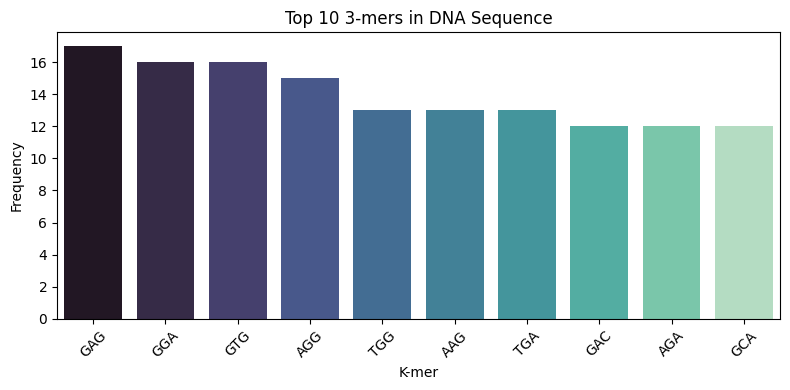

In [5]:
#Visualize K-mer Frequencies
plt.figure(figsize=(8, 4))
sns.barplot(x=list(kmer_counts.keys())[:10],y=list(kmer_counts.values())[:10], palette="mako")
plt.title(f"Top 10 {k}-mers in DNA Sequence")
plt.xlabel("K-mer")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()